In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\User\AppData\Local\Temp\ipykernel_27360\2848421323.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
housing = fetch_california_housing()

In [3]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

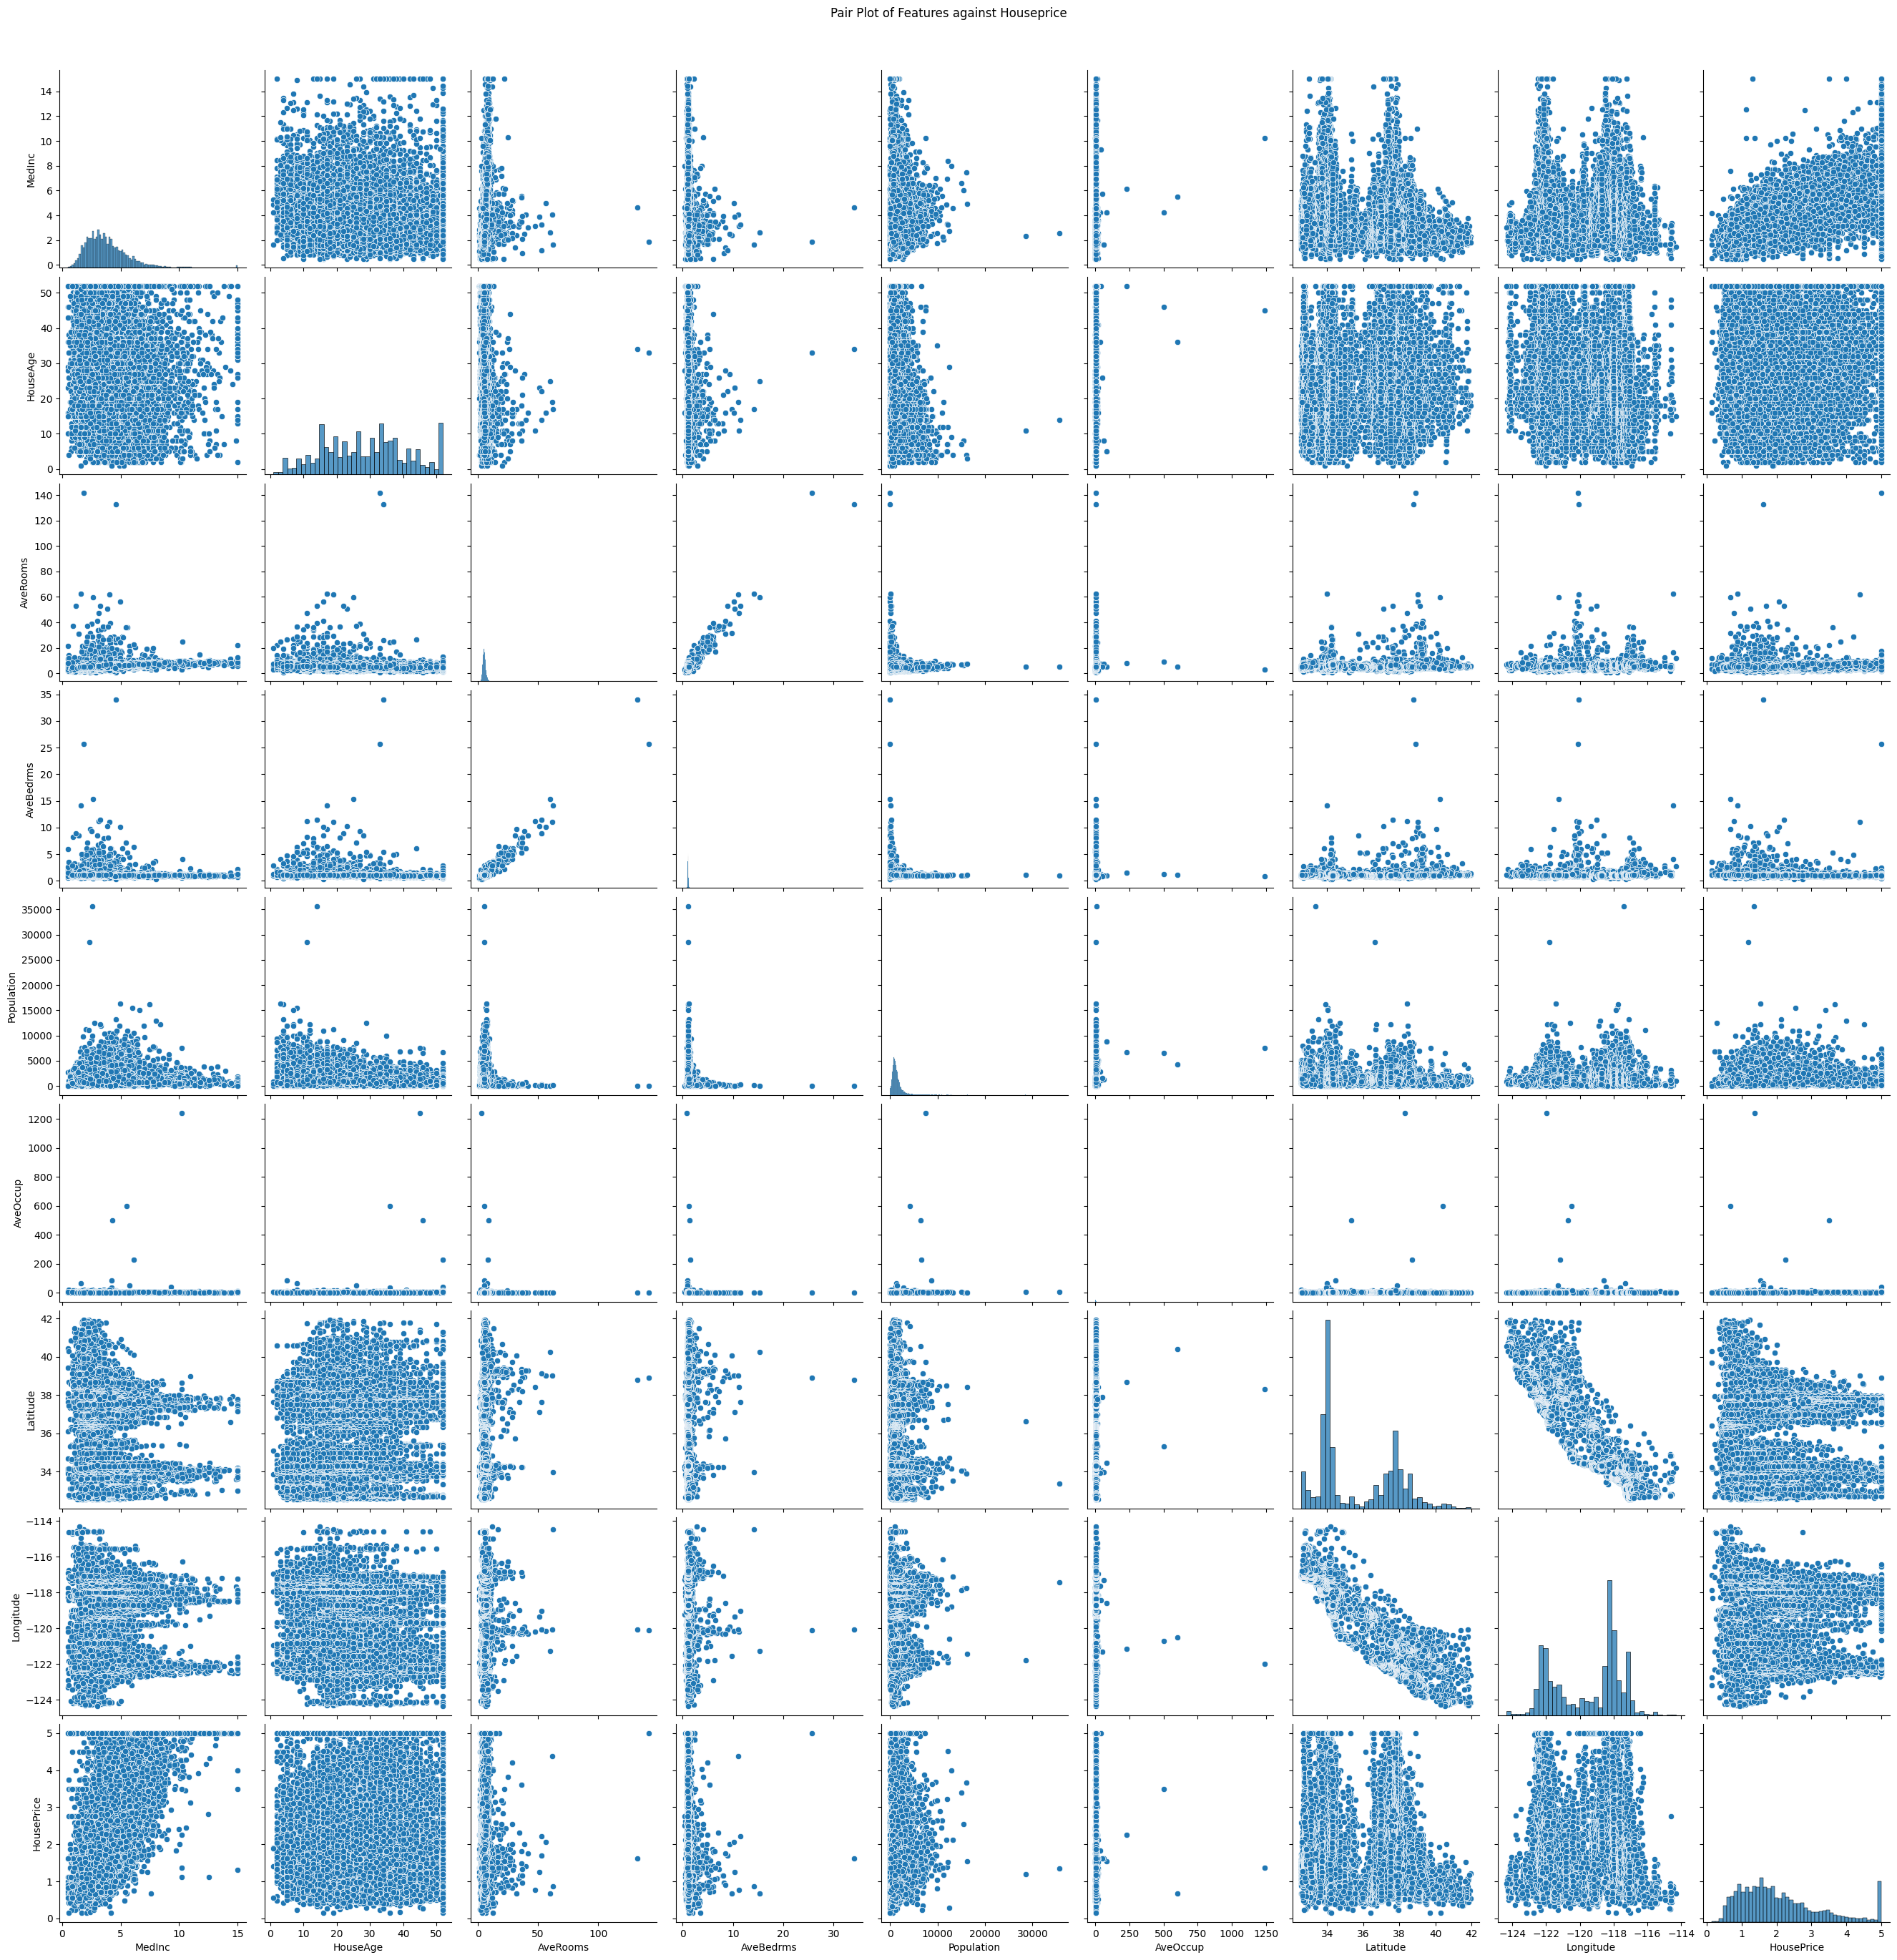

In [6]:
sns.pairplot(housing_df,height=3)
plt.suptitle('Pair Plot of Features against Houseprice',y=1.02)
plt.show()

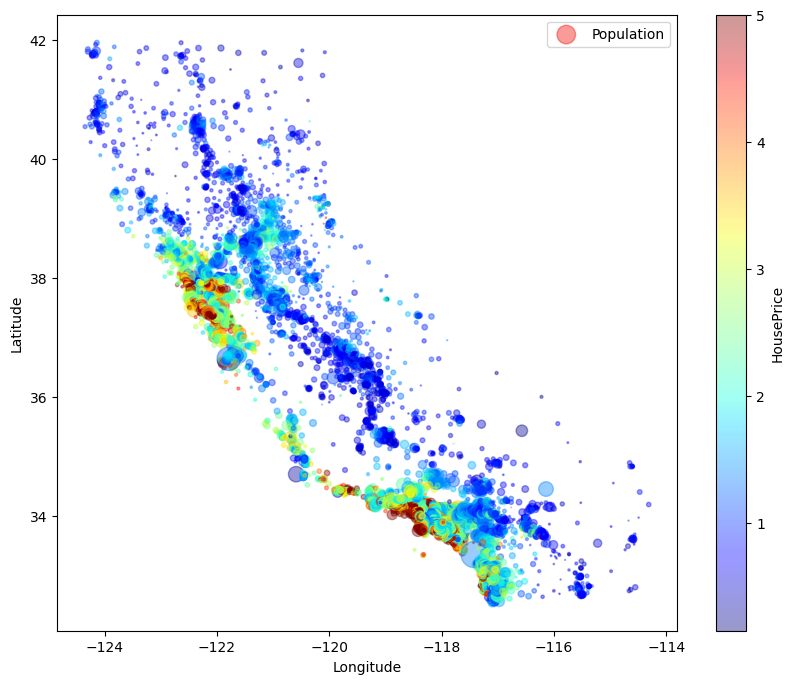

In [7]:
housing_df.plot(kind='scatter', 
                x='Longitude',
                y='Latitude',
                alpha=0.4,
                s=housing_df['Population']/100,
                label='Population',
                c='HousePrice',
                cmap='jet',
                colorbar=True,
                figsize=(10,8))

plt.show()

<Axes: >

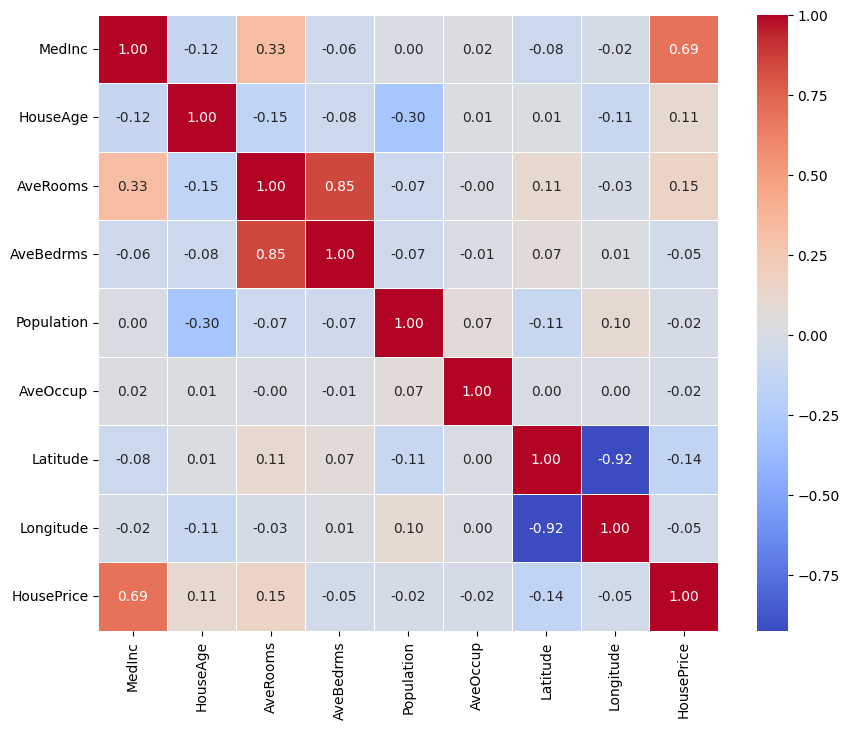

In [8]:
#Checking multicolinearity using the Variance Inflation Factor
corr = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f',linewidth=0.5)

In [9]:
#Calcuating the absoulte values of correlation of houseprice
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

* The above code can be used to identify the fatcors which strongly influence the House Price.

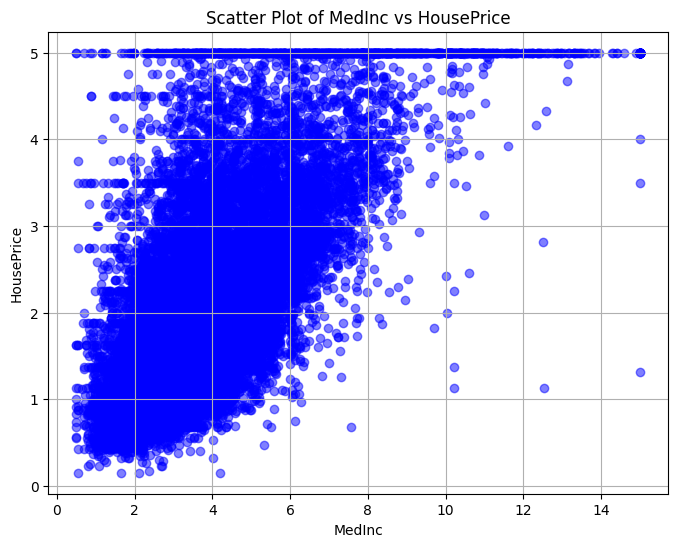

In [10]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medinc, houseprice, alpha=0.5, color='blue')
plt.title('Scatter Plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [11]:
#Calculating the variance inflation factor to each feature to identify the  multicolinearity. It helps to identify the correlation between features and 
#drop features.
housing_df_vif = housing_df.drop('HousePrice',axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))] 
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


* Higher VIF values means higher multicollinearity (latitude and longitude) so addressing them is important.

In [12]:
housing_df = housing_df.drop(['Latitude', 'Longitude'],axis=1)

In [13]:
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'],errors='coerce')

x = sm.add_constant(housing_df.drop('HousePrice',axis=1))
y = housing_df['HousePrice']

model = sm.OLS(y,x).fit()

* In the code snippet, the function sm.add_constant() from the statsmodels library is used to add a column of ones (a constant term) to the feature matrix x. This constant term is critical in linear regression and other statistical models for several reasons. Let's break down its usage and importance:

Purpose of Adding a Constant 
* **Intercept Term in Regression Models:** In linear regression, the model typically has an intercept term and one or more coefficients (slopes) for each predictor variable. The intercept term represents the point where the line or plane intersects the y-axis when all predictors are zero. Adding a constant to the feature matrix ensures that the regression model includes an intercept term.

* **Better Model Fitting:** Including a constant allows the regression model to fit the data more accurately by shifting the line or plane up or down, as needed. Without a constant, the model is forced through the origin, which might not accurately represent the relationship between the predictors and the response variable.

* **Statistical Assumptions:** Many statistical methods assume the presence of an intercept. Fitting a model without an intercept can lead to biased estimates, misleading results, and incorrect interpretations.


* In the given code snippet:
**sm.add_constant(housing_df.drop('HousePrice', axis=1))** adds a column of ones to the feature matrix x. This constant term becomes the intercept in the Ordinary Least Squares (OLS) regression model.
The resulting feature matrix x is then used to fit an OLS regression model with y as the response variable (housing_df['HousePrice']).
The add_constant() function ensures that the model includes an intercept, allowing it to fit the data more flexibly and accurately. Without this constant term, the regression model would assume that the relationship between the predictors and the response variable always goes through the origin, which is often not true in real-world data. Including the constant term typically leads to more reliable and interpretable models.

* Performing residual analysis to validate the linear regression assumptions and visualize the distribution of residuals and their relationship with the predicted values

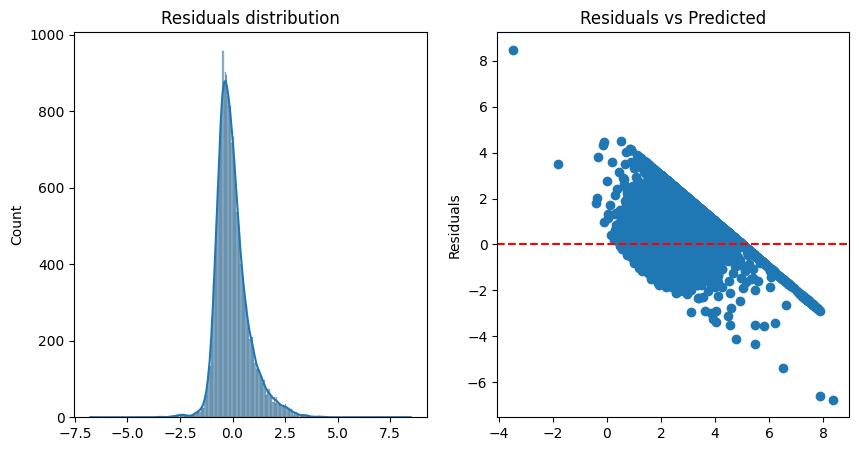

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [14]:
residuals = model.resid
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residuals distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.ylabel('Residuals')
plt.show()

print("Model coefficients:\n",model.params)

* The histogram displays a graph similar to a normal distribution with noticeable tails suggesting the presence of outliers in residuals. 

* The scatter plot shows residual against the predicted values. Ideally random scatter around the 0 line is expected but in this case there are some resiudals with potential large positive or negative values indicating potential outliers.

In [15]:
predictions = model.predict(x)
print("R Square score:",r2_score(y,predictions))
print("MSE:",mean_squared_error(y,predictions))

R Square score: 0.5396977345638283
MSE: 0.6129156196698703


In [16]:
def box_plots(df):
    fig,axes = plt.subplots(1,len(df.columns),figsize=(20,5))
    for i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)

    plt.show()

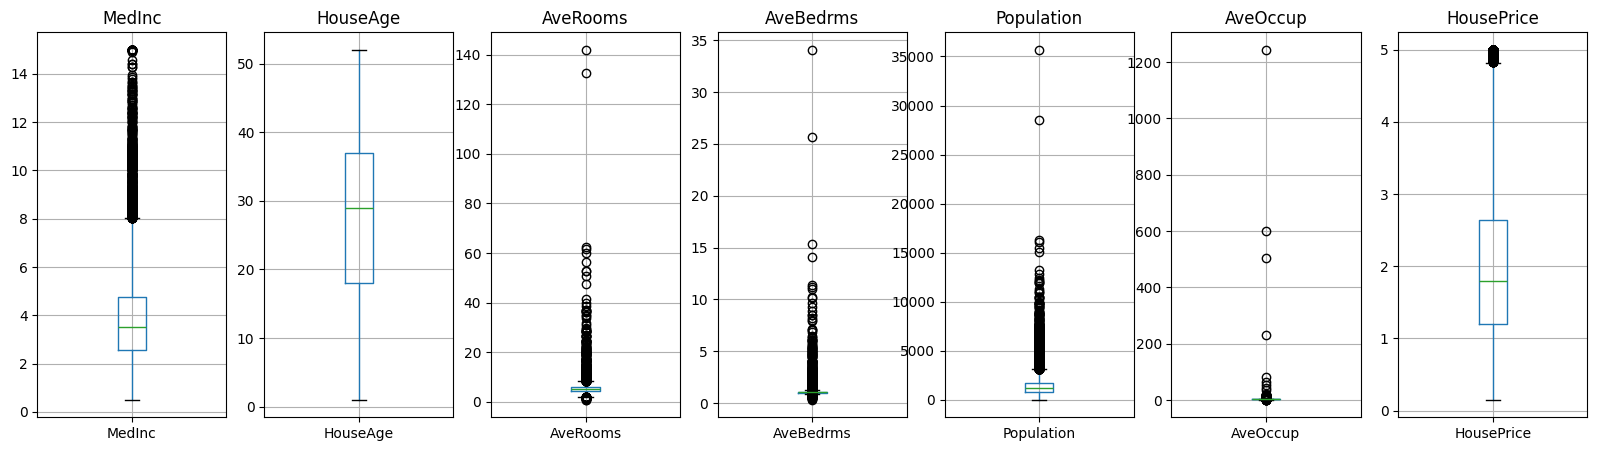

In [17]:
box_plots(housing_df)

* We can retain the outlier values by replacing them with the lower and upper bound values.

In [24]:
def remove_outliers(df):
    df_no_outliers = df.copy()

    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                       else upper_bound if x > upper_bound else x)

        return df_no_outliers

    housing_df_new = remove_outliers(housing_df)

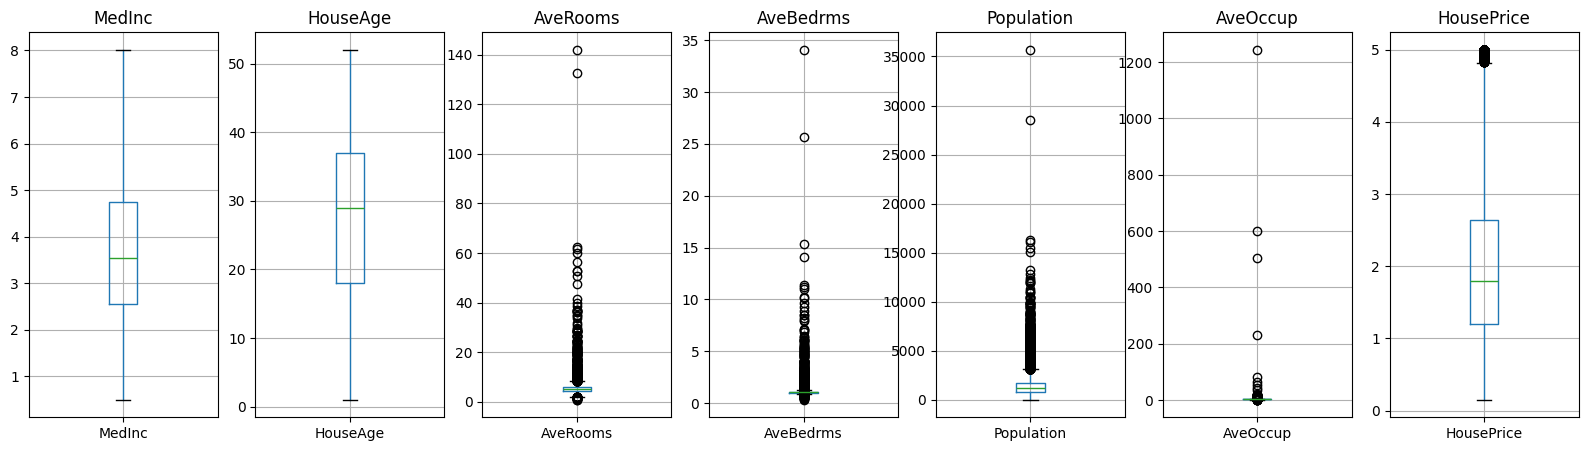

In [25]:
box_plots(housing_df_new)